This cell allows you to upload the dataset manually into the Colab environment. Use the file picker to upload online_gaming_behavior_dataset.csv, which will be read in the next step.

In [ ]:
# Upload CSV in Colab
from google.colab import files
uploaded = files.upload()

Saving online_gaming_behavior_dataset.csv to online_gaming_behavior_dataset.csv


In this step, we load the uploaded CSV file into a Pandas DataFrame. We then display a preview of the dataset, check its structure with .info(), and view summary statistics using .describe() to understand the distribution of numerical features.

In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("online_gaming_behavior_dataset.csv")

# Preview the first few rows
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


We visualize the distribution of the EngagementLevel target variable to understand how balanced or imbalanced the classes are. This is important for deciding whether to apply class balancing techniques like SMOTE. We also print the raw class counts for clarity.

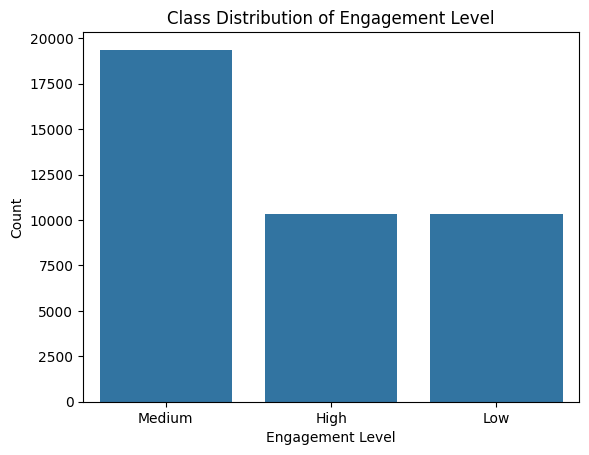

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64


In [4]:
# Check class distribution for EngagementLevel
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='EngagementLevel', data=df)
plt.title('Class Distribution of Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.show()

# Print raw counts
print(df['EngagementLevel'].value_counts())


Before encoding, we inspect the unique values in each categorical column. This helps us understand the number of distinct categories in each feature and ensures that no unexpected or incorrect values are present.

In [5]:
# Check unique values in original categorical columns
categorical_columns = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


Gender: ['Male' 'Female']
Location: ['Other' 'USA' 'Europe' 'Asia']
GameGenre: ['Strategy' 'Sports' 'Action' 'RPG' 'Simulation']
GameDifficulty: ['Medium' 'Easy' 'Hard']
EngagementLevel: ['Medium' 'High' 'Low']


In this step, we use LabelEncoder to convert categorical variables into numeric format. This includes both the input features (Gender, Location, GameGenre, GameDifficulty) and the target variable EngagementLevel. Label encoding is simple and memory-efficient, but assumes no order between categories.

After encoding, we visualize the distribution of values in each encoded feature and the target to confirm the transformation and check for class balance.

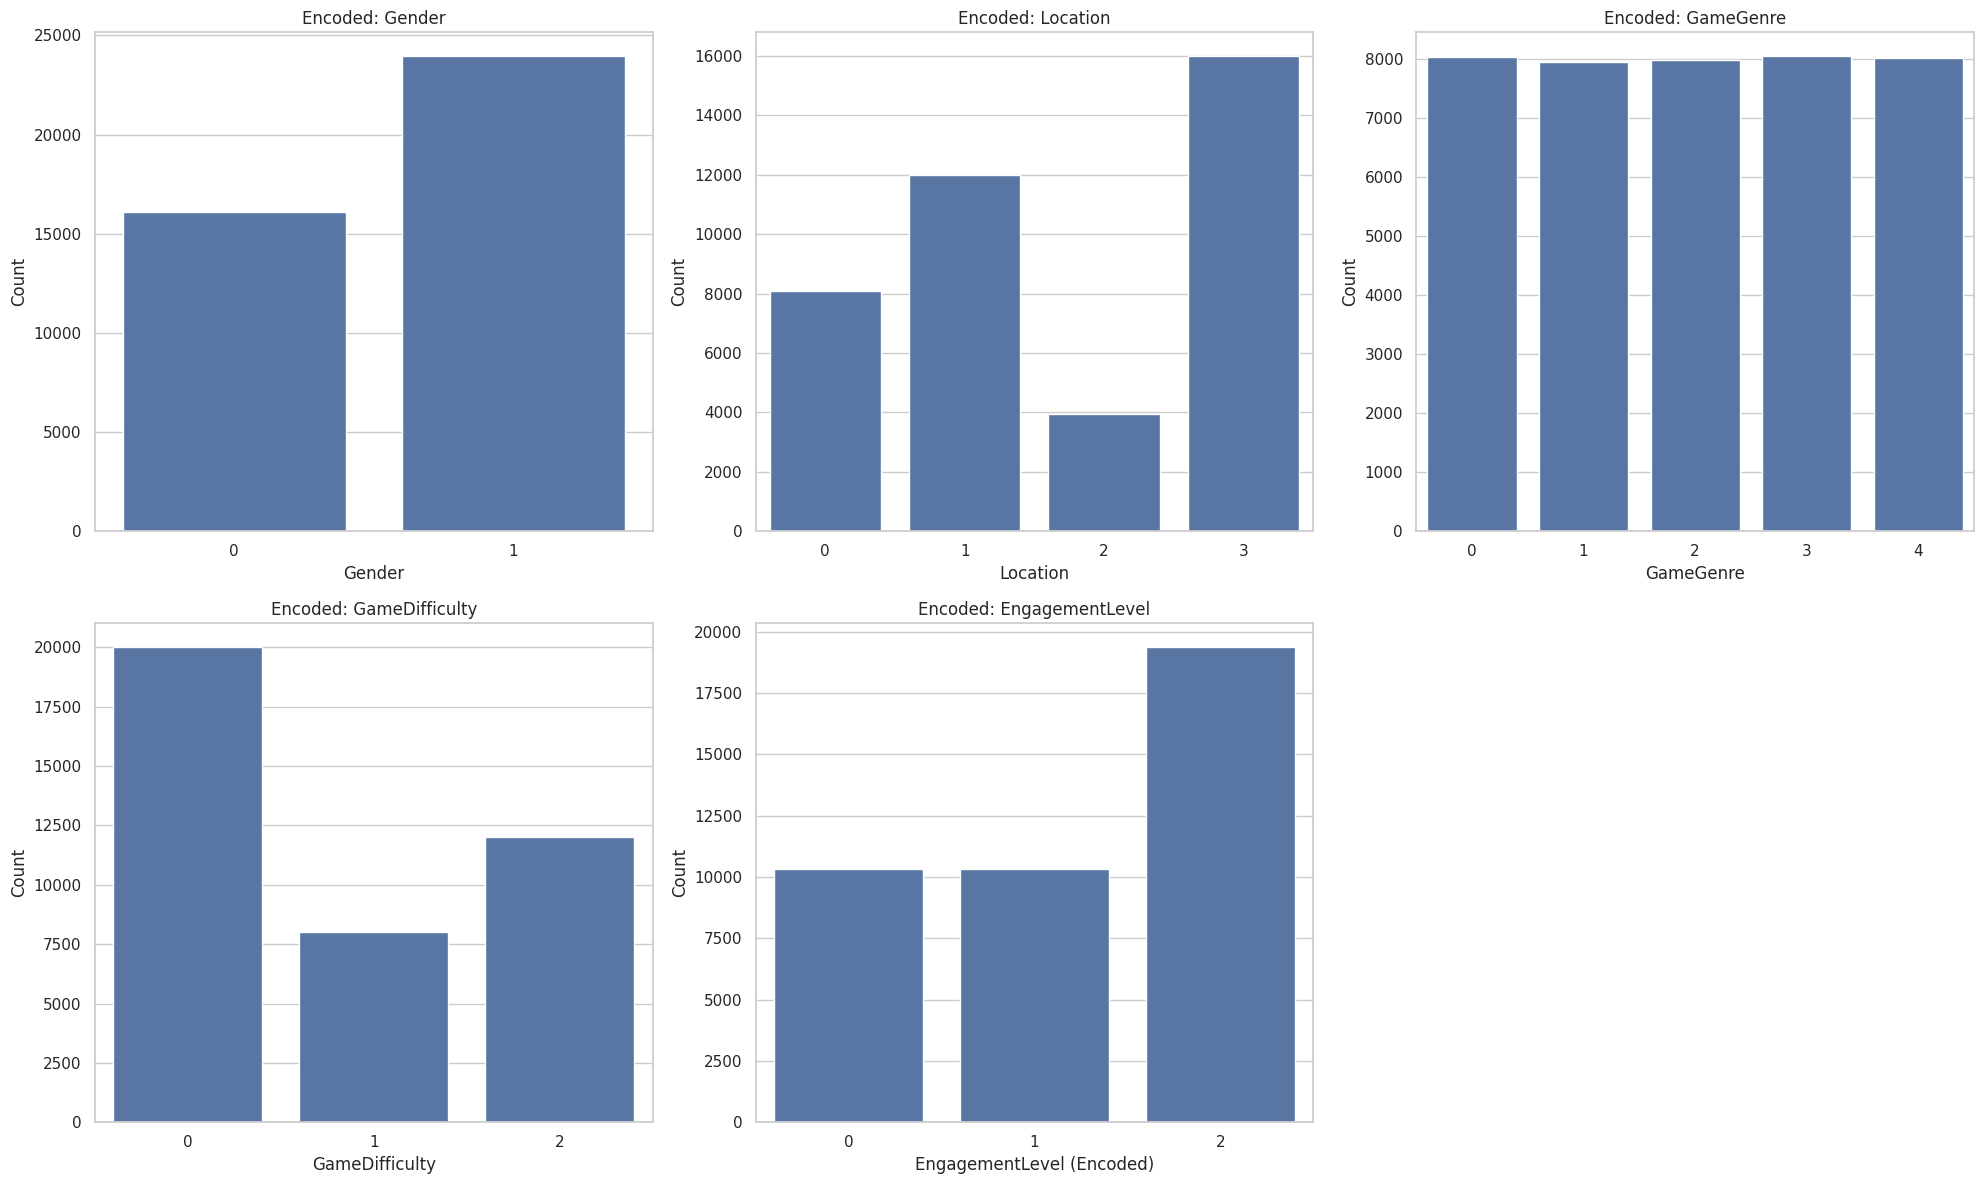

In [6]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical features (excluding target)
categorical_columns = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']
target_column = 'EngagementLevel'

# Initialize dictionary to store label encoders
le_dict = {}

# Encode each categorical feature using LabelEncoder
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Store encoder for future use if needed

# Encode target column
le_target = LabelEncoder()
df[target_column] = le_target.fit_transform(df[target_column])
le_dict[target_column] = le_target

# Visualize encoded categorical features and the target
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

# Plot encoded categorical features
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[col])
    plt.title(f'Encoded: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

# Plot encoded target
plt.subplot(2, 3, len(categorical_columns) + 1)
sns.countplot(x=df[target_column])
plt.title(f'Encoded: {target_column}')
plt.xlabel(f'{target_column} (Encoded)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


We drop the PlayerID column since it is a unique identifier and holds no predictive value for the model. Then, we separate the dataset into features (X) and the target variable (y) for the machine learning pipeline.

In [7]:
# Drop PlayerID
df.drop('PlayerID', axis=1, inplace=True)

# Split features and target
X = df.drop('EngagementLevel', axis=1)
y = df['EngagementLevel']


We split the dataset into training and testing sets using an 80/20 ratio. The stratify=y argument ensures that the distribution of the target classes (EngagementLevel) is preserved in both sets, which is important for fair evaluation of model performance on all classes.

In [8]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


The dataset has an imbalanced class distribution, which can negatively affect model performance, especially for minority classes.

We apply SMOTE (Synthetic Minority Over-sampling Technique) to the training data to balance the classes by generating synthetic samples for underrepresented categories.

This improves the model’s ability to learn patterns for all classes equally. The test set remains untouched for fair evaluation.

In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({2: 15499, 0: 8269, 1: 8259})
After SMOTE: Counter({1: 15499, 2: 15499, 0: 15499})


We generate a correlation matrix to visualize how numerical features are related to each other. This helps identify strong positive or negative correlations, which can provide insight into feature relationships and potential redundancy.

Although XGBoost is not sensitive to multicollinearity, this step is useful for data understanding and reporting.

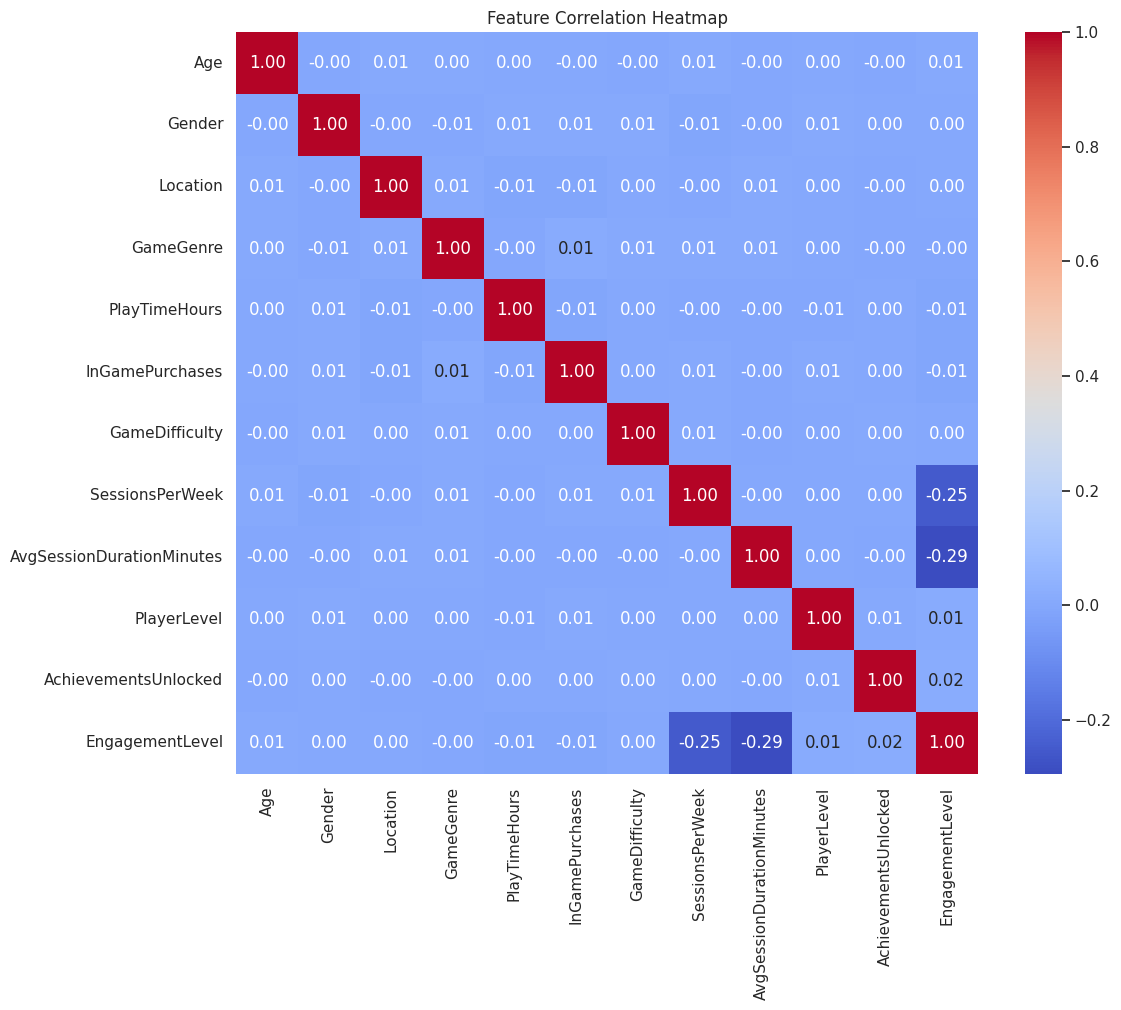

In [10]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


We train a baseline XGBoost Classifier on the balanced training data obtained from SMOTE. XGBoost is a powerful gradient boosting algorithm known for its performance with tabular data.

After training, we evaluate the model on the untouched test set using the following metrics:

- Accuracy: Overall correct predictions

- Classification Report: Precision, recall, and F1-score for each class

- Confusion Matrix: Actual vs. predicted values for detailed class-wise analysis

In [11]:
# XGBoost baseline model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:55:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9074559760209816

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      2067
           1       0.90      0.90      0.90      2065
           2       0.92      0.93      0.92      3875

    accuracy                           0.91      8007
   macro avg       0.90      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007


Confusion Matrix:
 [[1829   73  165]
 [  63 1850  152]
 [ 152  136 3587]]


XGBoost provides a built-in way to visualize feature importance based on how often and how effectively each feature is used in the decision trees. This helps us understand which features contribute most to predicting player engagement levels.

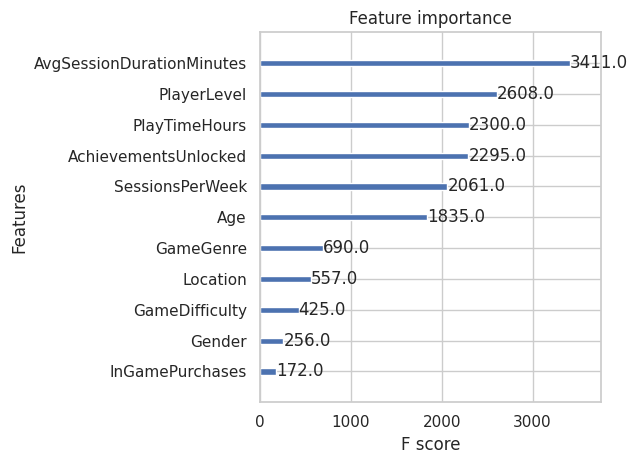

In [12]:
# Feature importance plot
from xgboost import plot_importance

plot_importance(model)
plt.tight_layout()
plt.show()


To improve the performance of the XGBoost model, we use RandomizedSearchCV to search for the best combination of hyperparameters.

This method randomly samples parameter combinations from a defined grid and performs cross-validation to select the best model.

Parameters tuned include:

- n_estimators: Number of boosting rounds

- max_depth: Depth of each tree

- learning_rate: Step size shrinkage

- subsample, colsample_bytree: Controls for overfitting

- gamma: Minimum loss reduction required for a split

In [13]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:59:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After tuning the hyperparameters, we evaluate the best model selected by RandomizedSearchCV on the test set.

We measure:

- Accuracy: Overall performance

- Classification Report: Precision, recall, and F1-score per class

- Confusion Matrix: Class prediction breakdown

- Training vs Test Accuracy: To check for overfitting

We also print the best parameter combination found during tuning.

In [14]:
# Evaluation of best model
y_pred_best = best_model.predict(X_test)

print("Best Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Best Parameters:", random_search.best_params_)

train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Best Accuracy: 0.9176970151117771

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      2067
           1       0.92      0.89      0.91      2065
           2       0.92      0.95      0.93      3875

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.92      0.92      0.92      8007


Confusion Matrix:
 [[1822   72  173]
 [  59 1844  162]
 [  99   94 3682]]
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 1.0}
Training Accuracy: 0.9651
Test Accuracy: 0.9177


We use ConfusionMatrixDisplay to visually represent the confusion matrix of the best XGBoost model on the test set.

This visualization helps us quickly see how well the model performs across each engagement class and where misclassifications occur.

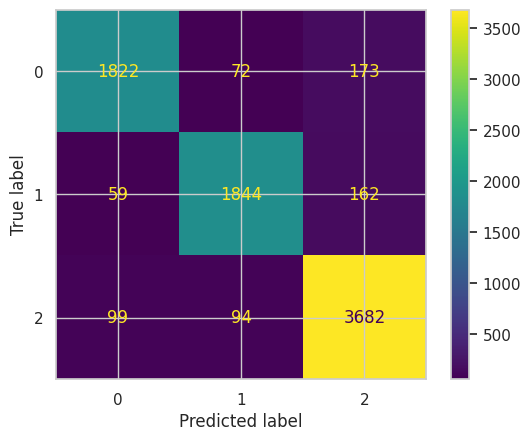

In [15]:
# Visual Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()


For comparison, we evaluate the initial XGBoost model (before hyperparameter tuning) on both the training and test sets.

This helps us understand the effect of tuning and whether the untuned model was overfitting or underperforming.

We compare training vs. testing accuracy and inspect classification reports and the confusion matrix to spot strengths and weaknesses.

In [16]:
# Additional (optional) evaluation for original model
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, train_preds))
print("Testing Accuracy:", accuracy_score(y_test, test_preds))

print("\nClassification Report on Training Data:\n", classification_report(y_train, train_preds))
print("\nClassification Report on Test Data:\n", classification_report(y_test, test_preds))

print("\nConfusion Matrix on Test Data:\n", confusion_matrix(y_test, test_preds))


Training Accuracy: 0.9440159865113811
Testing Accuracy: 0.9074559760209816

Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      8269
           1       0.95      0.92      0.93      8259
           2       0.94      0.97      0.95     15499

    accuracy                           0.94     32027
   macro avg       0.94      0.94      0.94     32027
weighted avg       0.94      0.94      0.94     32027


Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      2067
           1       0.90      0.90      0.90      2065
           2       0.92      0.93      0.92      3875

    accuracy                           0.91      8007
   macro avg       0.90      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007


Confusion Matrix on Test Data:
 [[1829   73  165]
 [  63 1850  152]
 [ 152  136 35